<a href="https://colab.research.google.com/github/tanvikurundkar/linear_and_logistic_regression/blob/main/Logistic_Regression_Tanvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="#de3023"><h1><b>MAKE A COPY OF THIS NOTEBOOK SO YOUR EDITS ARE SAVED</b></h1></font>

## Instructor Led Discussion

### Introduction to Breast Cancer Biopsy Classification

In this project, imagine that your colleague, an oncologist (cancer doctor), is working in a major hospital that specializes in treating breast cancers. Breast cancer tumors are very complicated at the cellular level, and this makes determining whether a patient's tumor is malignant (dangerous) or benign (not dangerous) a challenge. Your task will be to build a classifier that can determine whether a sample is malignant or benign to help your colleague!

Every patient that arrives at the hospital undergoes a biopsy of their tumor. This means that a small sample of the tumor is taken from the patient and various metrics are recorded about it, including: radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. 

Using a large dataset of labeled biopsy samples from breast cancer tumors, you will build your binary classification model to determine whether a tumor is malignant or benign based on these features. Then, this model can help you to better determine diagnoses for new patients who arrive at the hospital.


## Today...
We will explore together the steps that you could take to help your friend solve this problem!

#### Background and data exploration

- Exploring the data
- Visualizing the data

#### Predicting Diagnosis: Working up to Logistic Regression

- Approach 1: Linear Regression classifier

- Approach 2: Simple boundary classifier

- Approach 3: Modifying with logistic regression

- Approach 4: Multiple feature logistic regression

#### Bonus Discussion: What makes a separation good?
#### Optional: Decision trees walkthrough
#### Advanced (Optional): Choosing a Classifier



# Background and data exploration

## Diagnosing cancer with biopsies


**Before** we dive into building a classifier for breast cancer tumors, we will first discuss how the data are generated and what the various features mean.

![alt text](https://www.rxdatascience.com/hubfs/Raj%20Files/es1.jpg)

The above image is an example of cancerous (malignant) breast cells next to benign cells. These cells are part of a tumor biopsy where the extracted tissue is sampled with a special needle. The cells are subsequently stained with different dyes to help visualize their shapes, quantity of DNA, etc. These properties provide clues and insight into the rate of cell division (Rapid cell division = Cancerous). 
 ### Optional: Data Feature Descriptions

Our dataset reports 10 different features of the biopsies. Here's what a few of them mean:

1. $Perimeter$: Total distance between points defining the cell's nuclear perimeter.
2. $Radius$: Average distance from the center of the cell's nucleus to its perimeter.
3. $Texture$: The texture of the cell nucleus is measured by finding the variance of the gray scale intensities in the component pixels.
4. $Area$: Nuclear area is measured by counting the number of pixels on the interior of the nucleus and adding one-half of the pixels in the perimeter.

The following image should give a visual to what these cell nucleus features look like: 

![perimeter](https://drive.google.com/uc?export=view&id=1-U43OAojYbMY9gIlpvLHPNr3V2saqqHJ)

5. $Smoothness$: Measures the smoothness of a nuclear contour by measuring the difference between the length of a radial line and the mean length of the lines surrounding it. The image below demonstrates this:

![smoothness](https://drive.google.com/uc?export=view&id=10GokzG7KDKxClJwHPIuIcr3ivvWGRetY)

6. $Concavity$: Measures the severity of concavities or indentations in a cell nucleus. Chords are drawn between non-adjacent snake points and measure the extent to which the actual boundary lies inside each chord. The line in bold in the image below is an example of a chord.

![concavity](https://drive.google.com/uc?export=view&id=1EGdQLX0WAJkM8E598vnKvnMLY2ZVT6Le)

7. $Symmetry$: The major axis (longest chord) through the center is found. Then, the difference between the distance on both sides of the lines that are perpendicular to the major axis is calculated. The image below shows an example of this:

![symmetry](https://drive.google.com/uc?export=view&id=1EMzdkY5TVfA79xInjjeI6b_dYMpCmSSe)


The paper that first detailed these measurements for this dataset can be found here for more information: https://pdfs.semanticscholar.org/1c4a/4db612212a9d3806a848854d20da9ddd0504.pdf 


## Breast cancer diagnostic dataset

The dataset we will use to train our model is called the Breast Cancer Wisconsin (Diagnostic) Data Set. It consists of 569 biopsy samples, just like the ones described above, from breast cancer tumors. 

Each biopsy sample in the dataset is labeled with an ID number and whether or not the tumor it came from is malignant (1) or benign (0). Each sample also has 10 different features associated with it, some of which are described above. Remember that each feature value for a given biopsy sample is a real-valued number.

Think: what sorts of features would you expect to be different between a rapidly growing, malignant cancer cell and a healthy one? Why?

In [ ]:
#@title Run this to download your data! { display-mode: "form" }
# Load the data!
import pandas as pd
from sklearn import metrics

!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%202b%20-%20Logistic%20Regression/cancer.csv"

data = pd.read_csv('cancer.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('cancer.csv')
del data

cancer.csv          100%[===================>] 122.27K  --.-KB/s    in 0.002s  


## Loading our annotated dataset

The first step in building our breast cancer tumor classification model is to load in the dataset we'll use to "teach" (or "train") our model.

In [ ]:
# First, import helpful Python tools for loading/navigating data
import os             # Good for navigating your computer's files 
import numpy as np    # Great for lists (arrays) of numbers
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv)
from sklearn.metrics import accuracy_score   # Great for creating quick ML models


In [ ]:
data_path  = 'cancer.csv'

# Use the 'pd.read_csv('file')' function to read in read our data and store it in a variable called 'dataframe'
dataframe = pd.read_csv(data_path)

dataframe = dataframe[['diagnosis', 'perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']]
dataframe['diagnosis_cat'] = dataframe['diagnosis'].astype('category').map({1: '1 (malignant)', 0: '0 (benign)'})

# Exploring our data


 ## Looking at our dataset
  
 A key step in machine learning (and coding in general!) is to view the structure and dimensions of our new dataframe, which stores all our training data from the tumor biopsies. You can think of dataframes like Google or Microsoft Excel spreadsheets (large tables with row/column headers).

We want to confirm that the size of our table is correct, check out the features present, and get a more visual sense of what it looks like overall.

**Use the '.head()' method to show the first five rows of the table and their corresponding column headers (our biopsy features!)**

In [ ]:
# YOUR CODE HERE: 
dataframe.head()
# END CODE

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


Our colleague has given us documentation on what each feature column means. Specifically:

* $diagnosis$: Whether the tumor was diagnosed as malignant (1) or benign (0).
* $perimeter$_$mean$: The average perimeter of cells in that particular biopsy
* $radius$_$mean$: The average radius of cells in that particular biopsy
* $texture$_$mean$: The average texture of cells in that particular biopsy
* $area$_$mean$: The average area of cells in that particular biopsy
* $smoothness$_$mean$: The average smoothness of cells in that particular biopsy
* $concavity$_$mean$: The average concavity of cells in that particular biopsy
* $symmetry$_$mean$: The average symmetry of cells in that particular biopsy

Recall that the term mean refers to taking an average (summing the values for each cell and dividing by the total number of cells observed in that biopsy). 

In [ ]:
# Next, we'll use the 'info' method to see the data types of each column
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   diagnosis        569 non-null    int64   
 1   perimeter_mean   569 non-null    float64 
 2   radius_mean      569 non-null    float64 
 3   texture_mean     569 non-null    float64 
 4   area_mean        569 non-null    float64 
 5   smoothness_mean  569 non-null    float64 
 6   concavity_mean   569 non-null    float64 
 7   symmetry_mean    569 non-null    float64 
 8   diagnosis_cat    569 non-null    category
dtypes: category(1), float64(7), int64(1)
memory usage: 36.4 KB


**Discussion Question:** Which columns are numeric? Why?


 ## Visualizing our dataset

How can we determine the relationship between each of the "features" of these cells and the diagnosis?

The best way is to graph certain features in our data and see how they vary between different diagnoses! We will use some Python libraries like Seaborn and Matplotlib to make this an easier task for us.

In [ ]:
# First, we'll import some handy data visualization tools
import seaborn as sns
import matplotlib.pyplot as plt 

Let's focus on one feature for now: mean radius. How well does it predict diagnosis?

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


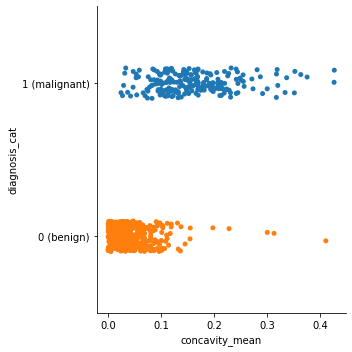

In [ ]:
sns.catplot(x = 'concavity_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
dataframe.head()

**Discussion Question:** How would you interpret what is going on in the chart above?

**Exercise**: Try out some other features (e.g. perimeter_mean, texture_mean, smoothness_mean) to see how they relate to the diagnosis. Which single feature seems like the best predictor?

# Predicting Diagnosis

Let's start by predicting a diagnosis using a single feature: radius mean. 


## Approach 1: Can we use linear regression to classify these cells?

Let's start by using an algorithm that we've seen before: linear regression!

**Discussion Question: How might linear regression be useful to classify examples from this dataset?**


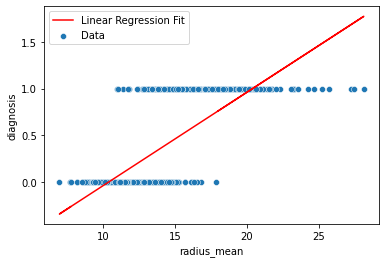

In [ ]:
#@title Run this to fit and visualize a linear regression (double-click to see code!)
from sklearn import linear_model

X,y = dataframe[['radius_mean']], dataframe[['diagnosis']]

model = linear_model.LinearRegression()
model.fit(X, y)
preds = model.predict(X)

sns.scatterplot(x='radius_mean', y='diagnosis', data=dataframe)
plt.plot(X, preds, color='r')
plt.legend(['Linear Regression Fit', 'Data'])

In [ ]:
#@title Take a look at the linear regression model and answer the following questions:

#@markdown What does a diagnosis of 0.0 mean?
diagnosis_0 = "Benign" #@param ["Malignant", "Benign", "Choose An Answer"] 

#@markdown What does a diagnosis of 1.0 mean?
diagnosis_1 = "Malignant" #@param ["Malignant", "Benign", "Choose An Answer"] 

if diagnosis_0 == 'Benign' and diagnosis_1 == 'Malignant':
  print("Correct! 0.0 is a benign prediction and 1.0 is malignant.")
else:
  print("One or both of our diagnoses' interpretations is incorrect. Try again!")

Correct! 0.0 is a benign prediction and 1.0 is malignant.


**Discuss: Did this linear regression model do well?** 

Hint: What would our linear regression model predict for a mean radius of 25? How about 30? Is this an appropriate output?

##Approach 2: Classification -  Simple Boundary Classifier
The variable we are trying to predict is categorical, not continuous! So we can't use a linear regression; we have to use a classifier.


### Classification is just drawing boundaries!

The simplest approach to classification is just drawing a boundary. Let's pick a boundary value for the radius mean and see how well it separates the data.

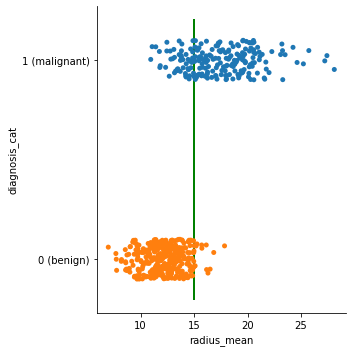

In [ ]:
boundary = 15 # change me!

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([boundary, boundary], [-.2, 1.2], 'g', linewidth = 2)

**Question:** Does this boundary value separate the data well? What do the points in each part of the graph represent?


### Building the boundary classifier

Here we build a boundary classifier function that takes in a **target boundary**: a particular value of radius mean. This function will take in a boundary value of our choosing and then classify the data points based on whether or not they are above or below the boundary.

**Exercise: Write a function to implement a boundary classifier.** You'll take in a `target_boundary` (a `float` or `int` like 15) and a `radius_mean_series` (a list of values) and return a list of predictions! 

In [ ]:
def boundary_classifier(target_boundary, radius_mean_series):
  result = [] #fill this in with predictions!
  # YOUR CODE HERE
  for i in (radius_mean_series):
    if i> target_boundary:
       result.append(1)
    else:
      result.append(0)
  return result

The code below chooses a boundary and runs your classifer.

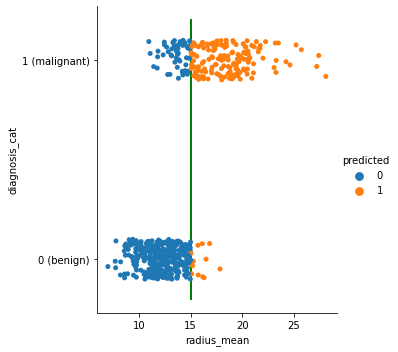

In [ ]:
chosen_boundary = 15 #Try changing this!

y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
dataframe['predicted'] = y_pred

y_true = dataframe['diagnosis']

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([chosen_boundary, chosen_boundary], [-.2, 1.2], 'g', linewidth = 2)

What do you think of the results based on the graph?

We can take a look at `y_true` and `y_pred` - how similar do they look?

In [ ]:
print (list(y_true))
print (y_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 

Let's calculate our accuracy!

In [ ]:
accuracy = accuracy_score(y_true,y_pred)
print(accuracy)

0.8892794376098418


**Now adjust the chosen boundary above to get the best possible 'separation'.** As you do that, think about what it means for a separation to be 'good' - is it just the highest accuracy? 

##Approach 3: Logistic Regression - using machine learning to determine the optimal boundary



Now, it's time to move away from our simple guess-and-check model and work towards implementing an approach that can automatically find a better separation. One of the most common methods for this is called 'Logistic Regression'. 

### Training Data vs Test Data

We'll split up our data set into groups called 'train' and 'test'. We teach our 'model' the patterns using the train data, but the whole point of machine learning is that our prediction should work on 'unseen' data or 'test' data. 

The function below does this for you. 


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

Let's now take a look at the 'train' and 'test' groups:


In [ ]:
print('Number of rows in training dataframe:', train_df.shape[0])
train_df.head()

Number of rows in training dataframe: 455


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
408,1,117.80,17.99,20.66,991.7,0.10360,0.120100,0.1992,1 (malignant),1
4,1,135.10,20.29,14.34,1297.0,0.10030,0.198000,0.1809,1 (malignant),1
307,0,56.36,9.00,14.40,246.3,0.07005,0.003681,0.1788,0 (benign),0
386,0,78.78,12.21,14.09,462.0,0.08108,0.068390,0.1646,0 (benign),0
404,0,78.29,12.34,14.95,469.1,0.08682,0.021090,0.1571,0 (benign),0


In [ ]:
print('Number of rows in test dataframe:', test_df.shape[0])
test_df.head()

Number of rows in test dataframe: 114


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
421,0,98.22,14.69,13.98,656.1,0.10310,0.14500,0.2086,0 (benign),0
47,1,85.98,13.17,18.66,534.6,0.11580,0.12260,0.2128,1 (malignant),0
292,0,83.14,12.95,16.02,513.7,0.10050,0.06155,0.1730,0 (benign),0
186,1,118.60,18.31,18.58,1041.0,0.08588,0.08169,0.1621,1 (malignant),1
414,1,96.71,15.13,29.81,719.5,0.08320,0.04686,0.1852,1 (malignant),1


### Single Variable Logistic Regression
To start with, let's set our input feature to be radius mean and our output variable to be the diagnosis. 

We will use this to build a logistic regression model to predict the diagnosis using radius mean.

In [ ]:
X = ['radius_mean']
y = 'diagnosis'

X_train = train_df[X]
print('X_train, our input variables:')
print(X_train.head())
print()

y_train = train_df[y]
print('y_train, our output variable:')
print(y_train.head())

X_train, our input variables:
     radius_mean
408        17.99
4          20.29
307         9.00
386        12.21
404        12.34

y_train, our output variable:
408    1
4      1
307    0
386    0
404    0
Name: diagnosis, dtype: int64


**Discuss:** What's the difference between X_train and y_train?

Now, let's prepare our model (we haven't trained it yet):

In [ ]:
# Here, we create a 'reg' object that handles the line fitting for us!
logreg_model = linear_model.LogisticRegression()

###Making Predictions

Next, we want to tell our 'logreg_model' object to take in our inputs (X) and our true labels (y) and fit a line that predicts y from X.

**Exercise:** Can you place the arguments `X_train` and `y_train` correctly into this function to do this?

`logreg_model.fit(FILL_ME_IN, FILL_ME_IN)`


In [ ]:
### YOUR CODE HERE
logreg_model.fit(X_train,y_train)
### END CODE

LogisticRegression()

### Testing our model 

How do we know if our 'model' is actually 'learning' anything? We need to test it on unseen data.

Here we will be designating test inputs to check our model. Let's prepare the inputs and outputs from our testing dataset - try printing them out!

In [ ]:
X_test = test_df[X]
y_test = test_df[y]

### Making predictions on our test set

Next, we need to figure out what our line thinks the diagnosis is based on our data points

**Exercise:** Fill in the appropriate input to this function and run the function below.

`y_pred = logreg_model.predict(FILL_ME_IN)`

In [ ]:
## YOUR CODE HERE
y_pred = logreg_model.predict(X_test)
## END CODE

Run the code below to visualize the results!

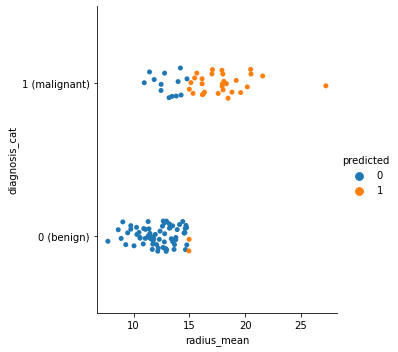

In [ ]:
test_df['predicted'] = y_pred.squeeze()
sns.catplot(x = X[0], y = 'diagnosis_cat', hue = 'predicted', data=test_df, order=['1 (malignant)', '0 (benign)'])

How does it look compared to the predictions before?

### Finally, let's evaluate the accuracy of our model.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.868421052631579


## What is logistic regression doing? It's giving 'soft' predictions!


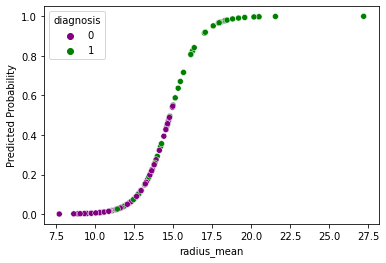

In [ ]:
#@title Run this to plot logistic regression's soft probabilities { display-mode: "form" }

# Let's visualize the probabilities for `X_test`
y_prob = logreg_model.predict_proba(X_test)
X_test_view = X_test[X].values.squeeze()
plt.xlabel('radius_mean')
plt.ylabel('Predicted Probability')
sns.scatterplot(x = X_test_view, y = y_prob[:,1], hue = y_test, palette=['purple','green'])

The Y-axis is the  probability of being 'malignant' and the X-axis is the radius mean. The colors show the **true** diagnosis (this is different than previous graphs!)

**Can you interpret or take a guess about what the graph above is saying?**

# Approach 4: Multiple Feature Logistic Regression 

Which features best predict the diagnosis?

Now that we can use logistic regression to find the optimal classification boundary, let's try out other features to see how well they predict the diagnosis.

First let's print out one row of our table so we can see what other features we have available to us.


In [ ]:
dataframe.head(1)

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
0,1,122.8,17.99,10.38,1001.0,0.1184,0.3001,0.2419,1 (malignant),1


### Experimenting with Single-Variable Logistic Regression

First, let's practice what we've done already! Fill in the code below to prepare your X and y data, fit the model on the training data, and predict on the test data.

**Exercise:** Once you have this code working, try replacing radius_mean with other features to see how well each feature predicts diagnosis!


In [ ]:
X = ['radius_mean'] #Try changing this later!
y = 'diagnosis'

# 1. Split data into train and test
train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

# 2. Prepare your X_train, X_test, y_train, and y_test variables by extracting the appropriate columns:
X_train=train_df[X]
y_train=train_df[y]
X_test=test_df[X]
y_test=test_df[y]
# 3. Initialize the model object
logreg_model = linear_model.LogisticRegression()
# 4. Fit the model to the training data
logreg_model.fit(X_train,y_train)
# 5. Use this trained model to predict on the test data
y_pred=logreg_model.predict(X_test)
# 6. Evaluate the accuracy by comparing to to the test labels and print out accuracy.
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.868421052631579


**Discussion**: Which features best predicted diagnosis? What does this teach us about breast cancer?

## Can we use multiple features together to do even better?
So far, we've just been using `radius_mean` to make predictions. But there's lots of other potentially important features that we could be using!

Let's take a look again:

In [ ]:
dataframe.head(1)

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
0,1,122.8,17.99,10.38,1001.0,0.1184,0.3001,0.2419,1 (malignant),1


### Logistic Regression with Multiple Features

Now, let's try re-fitting the model using **your choice of multiple features.**

Just add more features to the list: for example, to use two features you could have

`multi_X = ['radius_mean','area_mean']`

In [ ]:
multi_X = ['concavity_mean','perimeter_mean']
y = 'diagnosis'

# 1. Split data into train and test
multi_train_df, multi_test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

# 2. Prepare your X_train, X_test, y_train, and y_test variables by extracting the appropriate columns:
multi_X_train=multi_train_df[multi_X]
y_train=multi_train_df[y]
multi_X_test=multi_test_df[multi_X]
y_test=multi_test_df[y]
# 3. Initialize the model object
model = linear_model.LogisticRegression()
# 4. Fit the model to the training data
model.fit(multi_X_train,y_train)
# 5. Use this trained model to predict on the test data
multi_preds=model.predict(multi_X_test)
# 6. Evaluate the accuracy by comparing to to the test labels and print out accuracy.
accuracy=accuracy_score(y_test,multi_preds)
print(multi_X)
print(accuracy)

['concavity_mean', 'perimeter_mean']
0.8596491228070176


Logistic Regression can learn an optimal classification boundary by using multiple features together, which can improve its prediction accuracy even more!

# Bonus Discussion: What makes a separation good?

We know our overall accuracy, so we know how many errors we make overall.

But errors come in two kinds:

**False positives:** The model predicts that a sample is malignant (positive), but it's actually benign.

**False negatives:** The model predicts that a sample is benign (negative), but it's actually malignant.

**Discuss:** In medical diagnoses, what are the dangers of each kind of mistake? What kind is worse? Can you think of an application where the opposite is true?

A key insight is that there's a trade-off between the two kinds of errors! For example, how could you make a classifier that's guaranteed to have no false negatives? Would that be a good classifier?

We have to find an acceptable balance!

###Confusion Matrices
Next, let's evaluate the performance of our model quantitatively. We can visualize statistics on the number of correct vs. incorrect predictions using a confusion matrix that shows the following: 

![Confusion Matrix](https://miro.medium.com/max/860/1*7EcPtd8DXu1ObPnZSukIdQ.png)

where the terms mean:

* **TP (True Positive)** = The model predicted positive (malignant in our case, since malignant has a label of 1) and it’s true.
* **TN (True Negative)** = The model predicted negative (benign in our case, since benign has a label of 0) and it’s true. 
* **FP (False Positive)** = The model predicted positive and it’s false.
* **FN (False Negative)** = The model predicted negative and it’s false.

Text(0.5, 257.44, 'Predicted diagnosis')

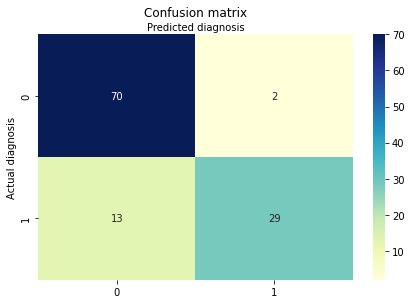

In [ ]:
#@title Run this code to create a confusion matrix. { display-mode: "form" }
#@markdown If you are curious how it works you may double-click to inspect the code.

# Import the metrics class
from sklearn import metrics

# Create the Confusion Matrix
# y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

In [ ]:
#@title Take a look at the confusion matrix and answer the following questions:

#@markdown What are the values in the top left (0, 0)?
top_left = "True Negatives" #@param ["True Positives", "True Negatives", "False Positives", "False Negatives", "Choose an Answer"] 

#@markdown What are the values in the bottom right (1, 1)?
bottom_right = "True Positives" #@param ["True Positives", "True Negatives", "False Positives", "False Negatives", "Choose an Answer"] 

#@markdown What are the values in the top right (0, 1)?
top_right = "False Positives" #@param ["True Positives", "True Negatives", "False Positives", "False Negatives", "Choose an Answer"] 

#@markdown What are the values in the bottom left (1, 0)?
bottom_left = "False Negatives" #@param ["True Positives", "True Negatives", "False Positives", "False Negatives", "Choose an Answer"] 

if top_left == "True Negatives" and bottom_right == "True Positives":
  print("Correct! Our results are True if our model is correct!")
else:
  print("One or both of our (0, 0) and (1, 1) interpretations is incorrect. Try again!")

if top_right == "False Positives":
  print("Correct! A false positive is when our model predicts that a sample is malignant when it's actually benign.")
else:
  print("That's not quite what (0, 1) values are. Try again!")

if bottom_left == "False Negatives":
  print("Correct! A false negative is when our model predicts that a sample is benign when it's actually malignant.")
else:
  print("That's not quite what (1, 0) values are. Try again!")

Correct! Our results are True if our model is correct!
Correct! A false positive is when our model predicts that a sample is malignant when it's actually benign.
Correct! A false negative is when our model predicts that a sample is benign when it's actually malignant.


**Discuss:**
- How many `True` values did our model predict?
- How many `False` values?
- Is our model a good classifier? Why or why not?

###Optional Challenge Exercise: Choosing a Metric

Depending on the situation, we might measure success in different ways. For example, we might use:

**Accuracy:** What portion of our predictions are right?

**Precision:** What portion of our positive predictions are actually positive?

**Recall:** What portion of the actual positives did we identify?

**Discuss: Which metric is most important for cancer diagnosis?**

To calculate any of these, we can use the numbers from our confusion matrix:

In [ ]:
print (cnf_matrix)
(tn, fp), (fn, tp) = cnf_matrix
print ("TN, FP, FN, TP:", tn, fp, fn, tp)

[[70  2]
 [13 29]]
TN, FP, FN, TP: 70 2 13 29


Now, calculate your model's performance by your chosen metric! You can use the [table on Wikipedia ](https://en.wikipedia.org/wiki/Confusion_matrix) to choose a metric and find a formula. How does it change your view of your model?


In [ ]:
#YOUR CODE HERE
accuracy = (tp + tn)/(tn + fp + fn + tp)
precision = (tp)/(tp + fp)
recall = tp/(tp + fn)

print ("accuracy, precision, recall", accuracy, precision, recall)

accuracy, precision, recall 0.868421052631579 0.9354838709677419 0.6904761904761905


**Congratulations!** You've successfully trained and evaluated a logistic regression model for diagnosing cancer.

#Optional: Decision Trees Walkthrough

Finally, let's try a different classification model: decision trees! Recall that with decision trees, we choose features that create the best splits of our dataset (separates it into classes as best it can at that time).

In [ ]:
#@title Create the model { display-mode: "both" }
from sklearn import tree

# We'll first specify what model we want, in this case a decision tree
class_dt = tree.DecisionTreeClassifier(max_depth=3)

# We use our previous `X_train` and `y_train` sets to build the model
class_dt.fit(multi_X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'X[1] <= 98.755\ngini = 0.468\nsamples = 455\nvalue = [285, 170]'),
 Text(0.25, 0.625, 'X[0] <= 0.112\ngini = 0.213\nsamples = 314\nvalue = [276, 38]'),
 Text(0.125, 0.375, 'X[0] <= 0.074\ngini = 0.113\nsamples = 283\nvalue = [266, 17]'),
 Text(0.0625, 0.125, 'gini = 0.033\nsamples = 236\nvalue = [232, 4]'),
 Text(0.1875, 0.125, 'gini = 0.4\nsamples = 47\nvalue = [34, 13]'),
 Text(0.375, 0.375, 'X[1] <= 68.95\ngini = 0.437\nsamples = 31\nvalue = [10, 21]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.4375, 0.125, 'gini = 0.311\nsamples = 26\nvalue = [5, 21]'),
 Text(0.75, 0.625, 'X[0] <= 0.073\ngini = 0.12\nsamples = 141\nvalue = [9, 132]'),
 Text(0.625, 0.375, 'X[0] <= 0.043\ngini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6875, 0.125, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.875, 0.375, 'X[1] <= 99.89\ngini = 0.031\nsamples = 128\nvalue = [2, 126]'),
 Tex

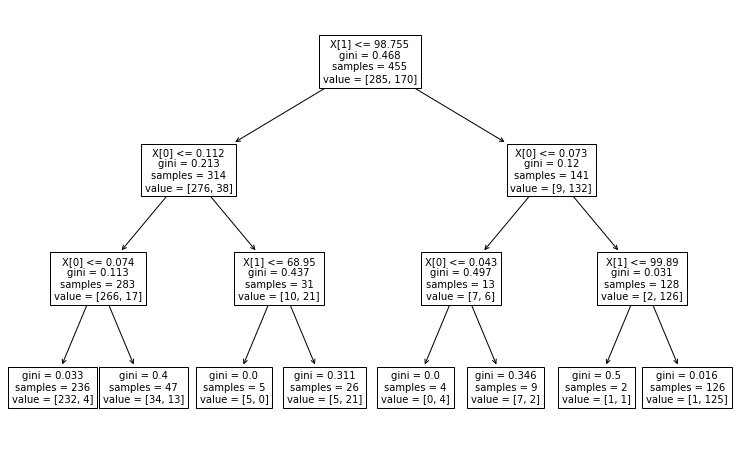

In [ ]:
#@title Visualize and interpret the tree
plt.figure(figsize=(13,8))  # set plot size
tree.plot_tree(class_dt, fontsize=10) 

In [ ]:
#@title Find the predictions based on the model { display-mode: "both" }
# now let's see how it performed!
multi_y_pred = class_dt.predict(multi_X_test)

In [ ]:
#@title Calculate model performance { display-mode: "both" }
print("Accuracy: ", metrics.accuracy_score(y_test, multi_y_pred))
print("Precision: ", metrics.precision_score(y_test, multi_y_pred))
print("Recall: ", metrics.recall_score(y_test, multi_y_pred))

Accuracy:  0.8947368421052632
Precision:  0.9166666666666666
Recall:  0.7857142857142857


**Question: What features are included in this classifier? How might you interpret this tree? Did this do better than the logistic regression?**

# Advanced (Optional): Choosing a Classifier
We've studied two common classifiers, but many more are available. You can read about some of them [here](https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/).

Let's try to choose the overall best classifier for this dataset. Fill in the code below to:
*   Use a for loop to train and evaluate each classifer in the list on our dataset.
*   Calculate the precision, recall, and accuracy on the test set for each classifier, and store the results in a data frame so it's easy to analyze.
*   Create plots to show the relationships between precision, accuracy, and recall and help you choose the "best" classifier.

Then experiment with changing the hyperparameters (options) of each classifier - can you get even better results?

In [ ]:
#@title Run this to import classifiers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [ ]:
#Once you've got your code working, try changing the hyperparameters of the classifiers
#to see if you can get even better results. 
#Can you find out what the hyperparameters mean?
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()] 


#Use a for loop to train and test each classifier, and print the results
#You might find the code above useful, as well as https://towardsdatascience.com/a-python-beginners-look-at-loc-part-2-bddef7dfa7f2 .

### YOUR CODE HERE ###




### END CODE ###

#TODO: Using pyplot, show the relationships between precision, recall, and/or accuracy.
#Tutorial here: https://matplotlib.org/tutorials/introductory/pyplot.html


**Think about:**
*   Which classifier would you choose?
*   What are the relationships among precision, recall, and accuracy? For this dataset, which is most important?
*   Can you find more successful hyperparameters for each classifer?

Your experiments will help you find a classifier that works very well on our test set. However, you're running a risk by doing so much manual fine-tuning: you might end up "overfitting" (on a more meta level) by choosing a classifier that works well on your test set, but might not work well on other data. 

That's why most machine learning projects actually use [*three* datasets](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7): a training set that we use to train each candidate model; a validation set that we use to evaluate each candidate model and choose the best one; and finally, a test set which we use only once, to report the overall performance of our project. 


